In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
# fla.head()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression


In [5]:
# LASSO model
#Note: Use an alpha of .7
from sklearn.linear_model import Lasso

In [6]:
# Ridge model
# Note: Use an alpha of .7
from sklearn.linear_model import Ridge

In [7]:
# ElasticNet model
# Note: Use an alpha of .7
from sklearn.linear_model import ElasticNet

In [8]:
#1.Create a list of stuff
features = ['GrossApproval', 'SBAGuarantee', 'PrinBalanceCollected', 'COAmount']
# Description [Full-Service Restaurant, Doctor's Office, Office of CPA, Plumbing & HVAC]
naics_codes = [722110, 621111, 541211, 238220]

#2. create an empty list that will hold dictionary.
ls = []

#3. create a for loop base NAICS Code
for code in naics_codes:
    
    filtered = fla[fla['NaicsCode'] == code]
    
    X = filtered[["PctOfGuarantee","DebtCoverage", "Leverage", "PctOfPrinColl","GrossApproval" ]]
    y = filtered["SBAGuarantee"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

#Linear
    linearModel = LinearRegression()
    linearModel.fit(X_train, y_train)
    linear_diff = sum(linearModel.predict(X_test) - y_test)
    linear_score = linearModel.score(X, y)
 #Lasso   
    lassoModel = Lasso(alpha=.7)
    lassoModel.fit(X_train, y_train)
    lasso_diff = sum(lassoModel.predict(X_test) - y_test)
    lasso_score = lassoModel.score(X, y)
#Ridge
    ridgeModel = Ridge(alpha=.7)
    ridgeModel.fit(X_train, y_train)
    ridge_diff = sum(ridgeModel.predict(X_test) - y_test)
    ridge_score = ridgeModel.score(X, y)
#ElasticNet
    elasticmodel = ElasticNet(alpha=.7)
    elasticmodel.fit(X_train, y_train)
    elastic_diff = sum(elasticmodel.predict(X_test) - y_test)
    elastic_score = elasticmodel.score(X, y)
    
    d = {}
    d['NaicsCode'] = code
    d['SBA Prediction_Linear'] = linear_diff
    d["SBA Prediction_Lasso"] = lasso_diff
    d["SBA Prediction_Ridge"] = ridge_diff
    d["SBA Prediction_Elastic"] = elastic_diff
    d['Linear Score'] = linear_score
    d['Lasso Score']= lasso_score
    d['Ridge Score']= ridge_score
    d['Elastic Score']= elastic_score
    
    
    
    
    for feature in features:

        d[feature + '(Sum)'] = filtered[feature].sum()
        d[feature + '(mean)'] = filtered[feature].mean()
        
    ls.append(d)
    

sw_df = pd.DataFrame(ls, columns=ls[0].keys())

sw_df

,NaicsCode,SBA Prediction_Linear,SBA Prediction_Lasso,SBA Prediction_Ridge,SBA Prediction_Elastic,Linear Score,Lasso Score,Ridge Score,Elastic Score,GrossApproval(Sum),GrossApproval(mean),SBAGuarantee(Sum),SBAGuarantee(mean),PrinBalanceCollected(Sum),PrinBalanceCollected(mean),COAmount(Sum),COAmount(mean)
0,722110,545387.603156,545363.879712,541142.011163,552434.587490,0.988050,0.988050,0.987852,0.985499,89724300,509797.159091,69892202,397114.784091,61135125.0,347358.664773,3064905,17414.232955
1,621111,358995.667449,358843.312790,312405.147756,-24790.293339,0.997429,0.997429,0.997422,0.995563,200177700,461238.940092,145104725,334342.684332,93441621.0,215303.274194,2907269,6698.776498
2,541211,-223204.240004,-223161.624949,-179838.494392,-45088.452857,0.996577,0.996577,0.996304,0.993864,39721200,296426.865672,29072160,216956.417910,17196300.0,128330.597015,2106335,15718.917910
3,238220,207571.050909,207470.461540,162985.584850,-7933.401431,0.998745,0.998745,0.998706,0.997821,60047100,277995.833333,42990160,199028.518519,23540623.0,108984.365741,846682,3919.824074


In [9]:
sw_df.to_excel("Summary_Industry.xls")

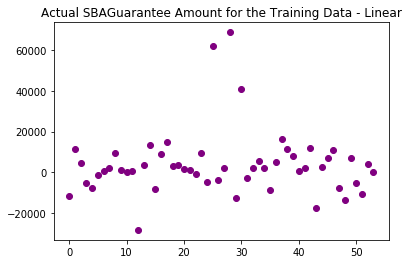

In [10]:
plt.scatter(range(0, len(y_test)), linearModel.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.title("Actual SBAGuarantee Amount for the Training Data - Linear")
plt.show()

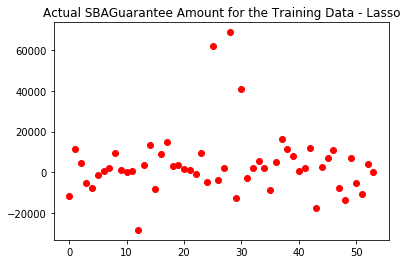

In [11]:
plt.scatter(range(0, len(y_test)), lassoModel.predict(X_test) - y_test, c="red", label="Testing Data")
plt.title("Actual SBAGuarantee Amount for the Training Data - Lasso")
plt.show()

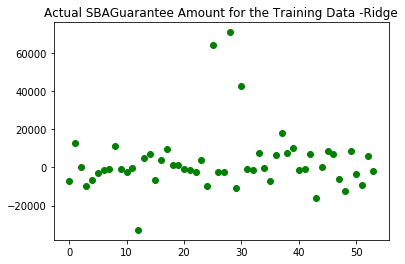

In [12]:
plt.scatter(range(0, len(y_test)), ridgeModel.predict(X_test) - y_test, c="green", label="Testing Data")
plt.title("Actual SBAGuarantee Amount for the Training Data -Ridge")
plt.show()

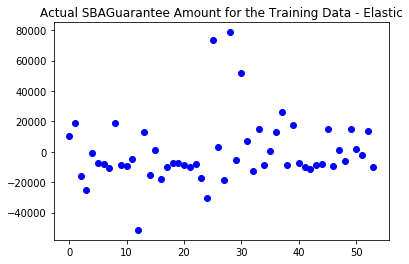

In [13]:
plt.scatter(range(0, len(y_test)), elasticmodel.predict(X_test) - y_test, c="blue", label="Testing Data")
plt.title("Actual SBAGuarantee Amount for the Training Data - Elastic")
plt.show()